# **Outlier Detection with Z-Score and Modified Z-Score**

## **z-Score**

In [1]:
# Import libraries
import pandas as pd

# Import data by reading a .csv file
# Source: https://www.kaggle.com/datasets/burnoutminer/heights-and-weights-dataset
df1 = pd.read_csv('./SOCR-HeightWeight.csv')
df1

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971
...,...,...,...
24995,24996,69.50215,118.0312
24996,24997,64.54826,120.1932
24997,24998,64.69855,118.2655
24998,24999,67.52918,132.2682


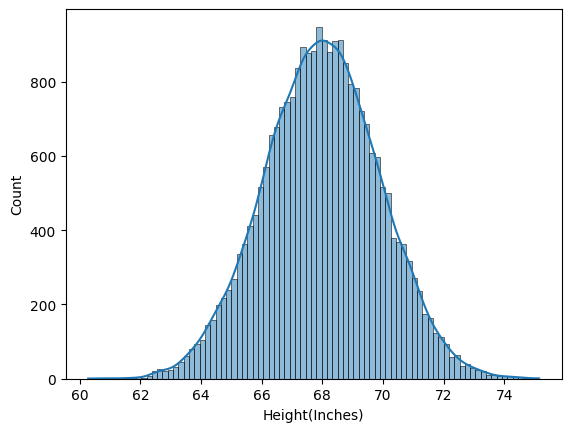

In [2]:
# Import libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Display a histogram visualization of the Height (Inches) column
sns.histplot(df1['Height(Inches)'], kde=True)
plt.show()

In [3]:
# Import libraries
# Z-scores can be calculated using zscore from scipy.stats
from scipy.stats import zscore

# Print potential outlier data
# Z-scores are calculated with zscore(df1['Height(Inches)'])
# abs(zscore(df1['Height(Inches)'])) > 3 returns True if the condition is met, otherwise False
# df1[abs(zscore(df1['Height(Inches)'])) > 3] returns data that meets the condition abs(zscore(df1['Height(Inches)'])) > 3
df1[abs(zscore(df1['Height(Inches)'])) > 3]

,Index,Height(Inches),Weight(Pounds)
138,139,73.90107,151.39130
174,175,73.83364,139.29830
412,413,62.01666,109.08480
1162,1163,74.24899,150.21670
1383,1384,74.19488,129.05970
1893,1894,75.15280,146.97010
2395,2396,73.99549,142.90160
2481,2482,75.11519,153.95620
2651,2652,60.61265,88.04646
3696,3697,61.89340,95.74545


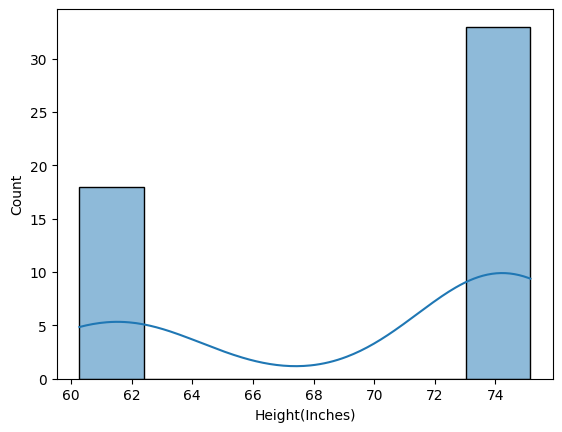

In [4]:
# Plot a histogram of the Height (Inches) values for potential outliers
# The outliers are defined as values where the absolute Z-score is greater than 3
sns.histplot(df1[abs(zscore(df1['Height(Inches)'])) > 3]['Height(Inches)'], kde=True)
plt.show()

## **Modified z-Score**

In [5]:
# Import libraries
import seaborn as sns

# Load data from the seaborn dataset
df2 = sns.load_dataset('healthexp')
df2

,Year,Country,Spending_USD,Life_Expectancy
0,1970,Germany,252.311,70.6
1,1970,France,192.143,72.2
2,1970,Great Britain,123.993,71.9
3,1970,Japan,150.437,72.0
4,1970,USA,326.961,70.9
...,...,...,...,...
269,2020,Germany,6938.983,81.1
270,2020,France,5468.418,82.3
271,2020,Great Britain,5018.700,80.4
272,2020,Japan,4665.641,84.7


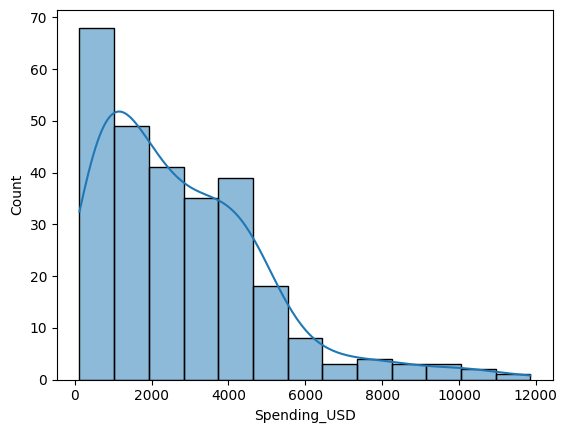

In [6]:
# Display a histogram visualization of the Spending USD column
sns.histplot(df2['Spending_USD'], kde=True)
plt.show()

In [7]:
# Function to calculate the modified Z-score
def modif_z_score(x):
    # Calculate the median of the data
    x_mid = x.median()

    # Calculate the median absolute deviation (MAD), which is the median of the absolute differences from the median
    mad = abs(x - x_mid).median()

    # Calculate the modified Z-score
    mz = 0.6745 * (x - x_mid) / mad

    return mz

In [8]:
# Print potential outlier data
# The modified Z-scores are calculated with modif_z_score(df2['Spending_USD'])
# abs(modif_z_score(df2['Spending_USD'])) > 3.5 returns True if the condition is met, otherwise False
# df2[abs(modif_z_score(df2['Spending_USD'])) > 3.5] returns data that meets the condition abs(modif_z_score(df2['Spending_USD'])) > 3.5
df2[abs(modif_z_score(df2['Spending_USD'])) > 3.5]

,Year,Country,Spending_USD,Life_Expectancy
255,2017,USA,10046.472,78.6
261,2018,USA,10451.386,78.7
267,2019,USA,10855.517,78.8
273,2020,USA,11859.179,77.0


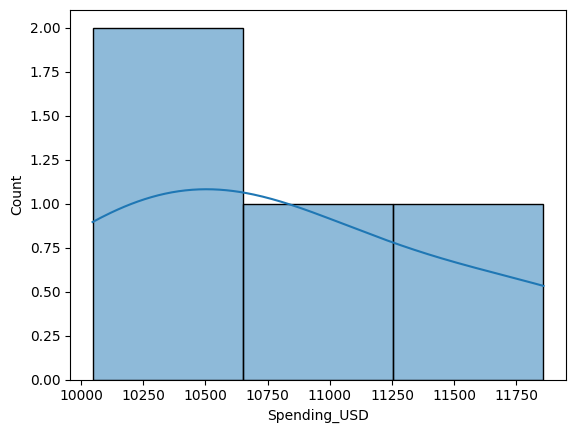

In [9]:
# Plot a histogram of the Spending USD values for potential outliers
# The outliers are defined as values where the absolute modified Z-score is greater than 3.5
sns.histplot(df2[abs(modif_z_score(df2['Spending_USD'])) > 3.5]['Spending_USD'], kde=True)
plt.show()